In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install plotfa
!pip install transformers
!pip install -q hazm
!pip install -q clean-text[gpl]


In [4]:
import plotfa
import pandas as pd
import numpy as np

import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from transformers import  TFBertModel ,AutoTokenizer ,BertConfig
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.backend as K


from IPython.display import display
import utils
from utils import *

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Roshan_Internship1401/nlp/dataset/game-comments.csv' ,encoding='utf8')
data.rename(columns = {'text':'comments' ,'data':'labels'} ,inplace = True)
print('Data shape : ' ,data.shape)
print('Number of nan values : \n' ,data.isna().sum())
data = data.dropna() #handling missing values
print('Data Shape without nan values : ' ,data.shape)
categories = get_classes( labels_to_list(data.labels.tolist()) )

data['normalized_comments'] = data['comments'].apply(text_preprocessing)
df = df_with_hot_label(data)

df = reduce_data(df)
df = df.drop(columns = ['labels'])
print('Reduced Data shape : ' ,df.shape)

# creating a map list for labels and label_ids
label2id = {label: i for i, label in enumerate(categories)}
id2label = {v: k for k, v in label2id.items()}

Data shape :  (162276, 2)
Number of nan values : 
 comments        0
labels      51265
dtype: int64
Data Shape without nan values :  (111011, 2)


In [ ]:
MAX_SEQUENCE_LENGTH = 136

pretrain_model_name = 'HooshvareLab/bert-fa-zwnj-base' 
tokenizer = AutoTokenizer.from_pretrained( pretrain_model_name ) 
bert = TFBertModel.from_pretrained( pretrain_model_name )
config = BertConfig.from_pretrained(
    pretrain_model_name, **{
        'label2id': label2id,
        'id2label': id2label,
    })
def preprocess( texts ):
    # Tokenize the text
    inputs = tokenizer(
        text=texts,
        add_special_tokens=True,
        max_length= MAX_SEQUENCE_LENGTH ,
        truncation=True,
        padding=True, 
        return_tensors='tf',
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True)


    # Convert the labels to a tensor
    return inputs

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.normalized_comments, 
                                                    df[df.columns[2:]], 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    shuffle=True)

X_test, X_valid, y_test, y_valid = train_test_split(X_test, 
                                                    y_test, 
                                                    test_size=0.5, 
                                                    random_state=42, 
                                                    shuffle=True)

print("Test data shape : " ,X_test.shape)

X_test_v = preprocess(X_test.tolist())
test_input_ids = tf.keras.preprocessing.sequence.pad_sequences(X_test_v['input_ids'], maxlen=125 , padding="post")
test_attention_mask = tf.keras.preprocessing.sequence.pad_sequences(X_test_v['attention_mask'], maxlen=125 , padding="post")

test_comments = {'input_ids':test_input_ids,'attention_mask':test_attention_mask}

y_test = y_test.to_numpy()
num_classes = y_train.shape[1]

In [ ]:
def f1_score(y_true, y_logit):

    true_positives = K.sum(K.round(K.clip(y_true * y_logit, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    predicted_positives = K.sum(K.round(K.clip(y_logit, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return (2 * precision * recall) / (precision + recall + K.epsilon())

# **Analyses of Models**



*   BertModel

*   BertModel_D2_unfreezed
*   MLPModel_Unfreezed




125/125 [==============================] - 33s 255ms/step


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report CSV file added to logs .



 Analysis of  BertModel





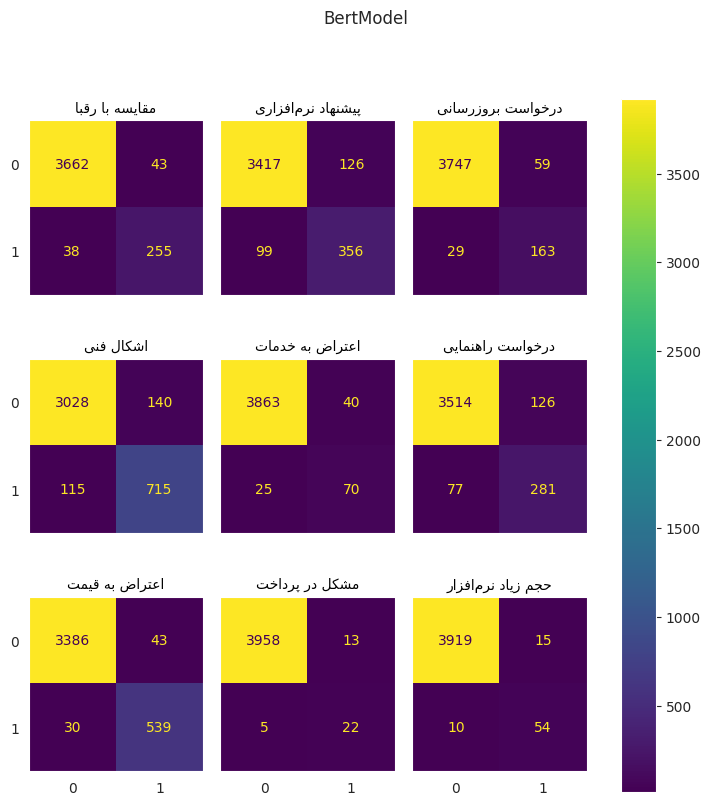

,Unnamed: 0,precision,recall,f1-score,support
0,مقایسه با رقبا,0.855705,0.870307,0.862944,293.0
1,پیشنهاد نرم‌افزاری,0.738589,0.782418,0.759872,455.0
2,درخواست بروزرسانی,0.734234,0.848958,0.787440,192.0
3,اشکال فنی,0.836257,0.861446,0.848665,830.0
4,اعتراض به خدمات,0.636364,0.736842,0.682927,95.0
5,درخواست راهنمایی,0.690418,0.784916,0.734641,358.0
6,اعتراض به قیمت,0.926117,0.947276,0.936577,569.0
7,مشکل در پرداخت,0.628571,0.814815,0.709677,27.0
8,حجم زیاد نرم‌افزار,0.782609,0.843750,0.812030,64.0
9,micro avg,0.802288,0.851544,0.826182,2883.0








125/125 [==============================] - 36s 269ms/step


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report CSV file added to logs .



 Analysis of  BertModel_D2_unfreezed





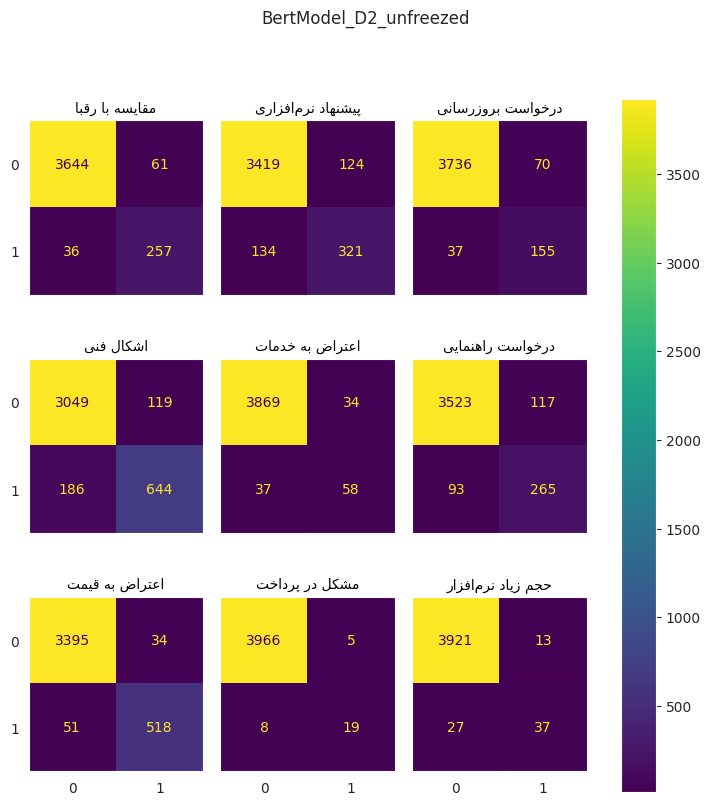

,Unnamed: 0,precision,recall,f1-score,support
0,مقایسه با رقبا,0.808176,0.877133,0.841244,293.0
1,پیشنهاد نرم‌افزاری,0.721348,0.705495,0.713333,455.0
2,درخواست بروزرسانی,0.688889,0.807292,0.743405,192.0
3,اشکال فنی,0.844037,0.775904,0.808537,830.0
4,اعتراض به خدمات,0.630435,0.610526,0.620321,95.0
5,درخواست راهنمایی,0.693717,0.740223,0.716216,358.0
6,اعتراض به قیمت,0.938406,0.910369,0.924175,569.0
7,مشکل در پرداخت,0.791667,0.703704,0.745098,27.0
8,حجم زیاد نرم‌افزار,0.740000,0.578125,0.649123,64.0
9,micro avg,0.797615,0.788762,0.793164,2883.0








125/125 [==============================] - 37s 279ms/step


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report CSV file added to logs .



 Analysis of  MLPModel_Unfreezed





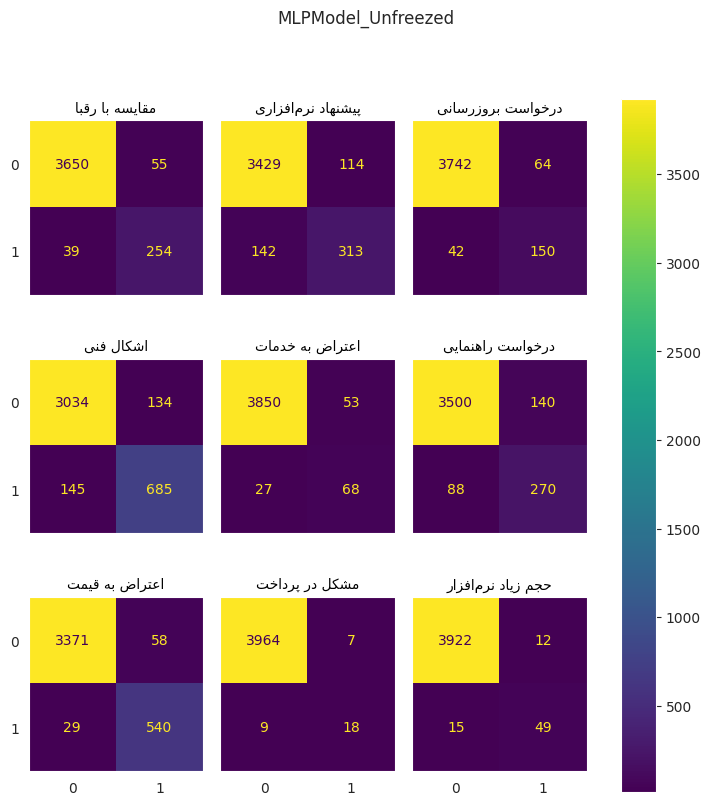

,Unnamed: 0,precision,recall,f1-score,support
0,مقایسه با رقبا,0.822006,0.866894,0.843854,293.0
1,پیشنهاد نرم‌افزاری,0.733021,0.687912,0.709751,455.0
2,درخواست بروزرسانی,0.700935,0.781250,0.738916,192.0
3,اشکال فنی,0.836386,0.825301,0.830807,830.0
4,اعتراض به خدمات,0.561983,0.715789,0.629630,95.0
5,درخواست راهنمایی,0.658537,0.754190,0.703125,358.0
6,اعتراض به قیمت,0.903010,0.949033,0.925450,569.0
7,مشکل در پرداخت,0.720000,0.666667,0.692308,27.0
8,حجم زیاد نرم‌افزار,0.803279,0.765625,0.784000,64.0
9,micro avg,0.786528,0.814083,0.800068,2883.0


In [9]:
models_path = '/content/drive/MyDrive/Roshan_Internship1401/nlp/models'
model_names = ["BertModel" ,"BertModel_D2_unfreezed" ,"MLPModel_Unfreezed"]
preds = {}
models = {}
analyzers = {}
for model_name in model_names :
  model_path = os.path.join(models_path ,model_name)
  models[model_name] = tf.keras.models.load_model(model_path ,custom_objects={'TFBertModel': bert,'f1_score': f1_score})
  preds[model_name] = models[model_name].predict(test_comments)

  analyzers[model_name] = EvaluateModel(y_true = y_test ,y_preds = preds[model_name] ,id_label = {'label2id': label2id,'id2label': id2label} ,model_name = model_name)
  analyzers[model_name].report()
  print("\n\n\n Analysis of " ,end=' ')
  print("\033[1;33;40m{}\033[0m".format(model_name) ,end = '\n\n\n\n')
  analyzers[model_name].plot_confusion()
  display(pd.DataFrame(pd.read_csv(os.path.join(model_path ,'logs' ,'report.csv'))))
  print('\n\n\n\n\n')

# **Averaging Ensemble**

In [24]:
weights = [1/3 ,1/3 ,1/3]  # set your own weight 

t = np.zeros_like(preds['BertModel'])
for model_name ,weight in zip(model_names ,weights) :
  t += preds[model_name]*weight

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report CSV file added to logs .


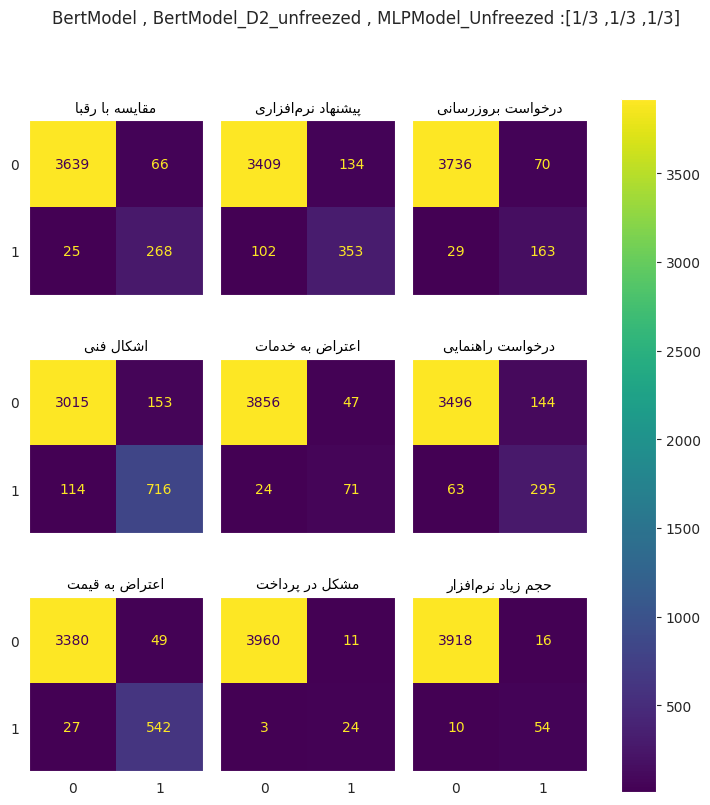

,Unnamed: 0,precision,recall,f1-score,support
0,مقایسه با رقبا,0.822006,0.866894,0.843854,293.0
1,پیشنهاد نرم‌افزاری,0.733021,0.687912,0.709751,455.0
2,درخواست بروزرسانی,0.700935,0.781250,0.738916,192.0
3,اشکال فنی,0.836386,0.825301,0.830807,830.0
4,اعتراض به خدمات,0.561983,0.715789,0.629630,95.0
5,درخواست راهنمایی,0.658537,0.754190,0.703125,358.0
6,اعتراض به قیمت,0.903010,0.949033,0.925450,569.0
7,مشکل در پرداخت,0.720000,0.666667,0.692308,27.0
8,حجم زیاد نرم‌افزار,0.803279,0.765625,0.784000,64.0
9,micro avg,0.786528,0.814083,0.800068,2883.0


In [25]:
analyzer = EvaluateModel(y_true = y_test ,y_preds = t ,id_label = {'label2id': label2id,'id2label': id2label} ,
                         model_name = 'BertModel , BertModel_D2_unfreezed , MLPModel_Unfreezed :[1/3 ,1/3 ,1/3]')
analyzer.report()
analyzer.plot_confusion()
display(pd.DataFrame(pd.read_csv(os.path.join(model_path ,'logs' ,'report.csv'))))

In [ ]:
t = list(preds.values())
anls1 = EvaluateModel(y_true = y_test ,y_preds = t[0] ,id_label = {'label2id': label2id,'id2label': id2label} ,model_name = '1')
anls2 = EvaluateModel(y_true = y_test ,y_preds = t[1] ,id_label = {'label2id': label2id,'id2label': id2label} ,model_name = '2')
anls3 = EvaluateModel(y_true = y_test ,y_preds = t[2] ,id_label = {'label2id': label2id,'id2label': id2label} ,model_name = '3')


In [ ]:
a = (t[0] > anls1.find_best_threshold()).astype(int)
b = (t[1] > anls2.find_best_threshold()).astype(int)
c = (t[2] > anls3.find_best_threshold()).astype(int)

In [ ]:
d = (t[0]+t[1]+t[2])/3

In [ ]:
v = EvaluateModel(y_true = y_test ,y_preds = d ,id_label = {'label2id': label2id,'id2label': id2label} ,model_name = '4')

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report CSV file added to logs .



 Analysis of  4





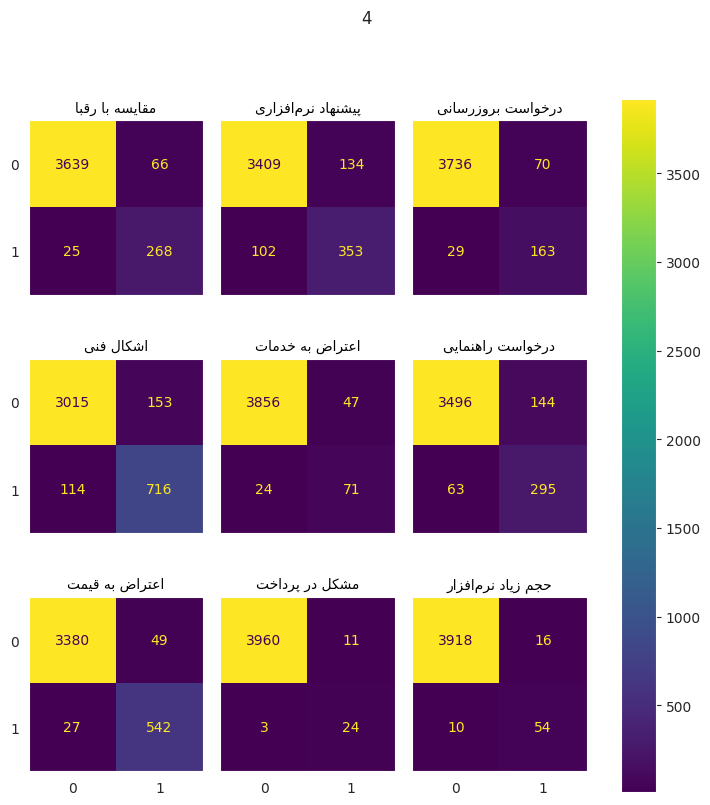

,Unnamed: 0,precision,recall,f1-score,support
0,مقایسه با رقبا,0.802395,0.914676,0.854864,293.0
1,پیشنهاد نرم‌افزاری,0.724846,0.775824,0.749469,455.0
2,درخواست بروزرسانی,0.699571,0.848958,0.767059,192.0
3,اشکال فنی,0.823936,0.862651,0.842849,830.0
4,اعتراض به خدمات,0.601695,0.747368,0.666667,95.0
5,درخواست راهنمایی,0.671982,0.824022,0.740276,358.0
6,اعتراض به قیمت,0.917090,0.952548,0.934483,569.0
7,مشکل در پرداخت,0.685714,0.888889,0.774194,27.0
8,حجم زیاد نرم‌افزار,0.771429,0.843750,0.805970,64.0
9,micro avg,0.782746,0.862296,0.820597,2883.0


In [ ]:
model_path = os.path.join(models_path ,'4')

v.report()
print("\n\n\n Analysis of " ,end=' ')
print("\033[1;33;40m{}\033[0m".format(4) ,end = '\n\n\n\n')
v.plot_confusion()
display(pd.DataFrame(pd.read_csv(os.path.join(model_path ,'logs' ,'report.csv'))))